# Exploring Seattle Pet Licenses

In [147]:
# Load Packages
from pprint import pprint
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Assess Directories
# Path.home() # Profile root directory
Path.cwd() # https://realpython.com/python-pathlib/
# Path('c:/Users/tbonn/Code/Python/Local/Data_Nash/Excel_File').parent # Parent directory of the string

# Create Data Filepath
# data_filepath = Path.cwd() / 'Data' / 'Seattle_Pet_Licenses.xlsx' # / pastes filepaths together
data_filepath = Path(r'C:\Users\tbonn\Code\Python\Local\Data_Nash\Excel_File\Data\Seattle_Pet_Licenses.xlsx')
pprint(data_filepath)


WindowsPath('C:/Users/tbonn/Code/Python/Local/Data_Nash/Excel_File/Data/Seattle_Pet_Licenses.xlsx')


## Read in the Data
Source: [Seattle Open Data Portal](https://data.seattle.gov/Community/Seattle-Pet-Licenses/jguv-t9rb/about_data)

In [148]:
# Read In Data
dat = pd.read_excel(data_filepath)

## Explore the Data

In [149]:
# Summary Peak of the Data
dat.head(10)

# Column Names & Nrows/Ncols
dat.columns
dat.shape

# Descriptions of Variable Types
dat.info() # Python Data Types: https://pbpython.com/pandas_dtypes.html

# Brief Summary Statistics of Variables
dat.describe()
print(dat.isnull().sum()) # Number of null values in each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42526 entries, 0 to 42525
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   License Issue Date  42526 non-null  object
 1   License Number      42526 non-null  object
 2   Animal's Name       42485 non-null  object
 3   Species             42526 non-null  object
 4   Primary Breed       42526 non-null  object
 5   Secondary Breed     28056 non-null  object
 6   ZIP Code            42409 non-null  object
dtypes: object(7)
memory usage: 2.3+ MB
License Issue Date        0
License Number            0
Animal's Name            41
Species                   0
Primary Breed             0
Secondary Breed       14470
ZIP Code                117
dtype: int64


## Clean Data Frame

In [150]:
## Convert Date Strings to Date Variables
dat['Date'] = pd.to_datetime(dat['License Issue Date'], format="%B %d %Y"); pprint(dat['Date'].head())

## Order Rows by Date (Asc; Earliest to Most Recent)
dat.sort_values('Date', ascending=True)

## Rename and Drop Variables
dat = dat.rename(columns= {
   'License Number': 'License_Number',
   'Animal\'s Name': "Animal_Name",
   'Primary Breed': 'Primary_Breed',
   'Secondary Breed': 'Secondary_Breed',
   'ZIP Code': 'Zip'}).drop(columns = ['License Issue Date'])

col_order = ['Date', 'Zip', 'License_Number', 'Species', 'Primary_Breed', 'Secondary_Breed', 'Animal_Name']
dat_clean = dat[col_order]

## Extract Year and Month Variables from Date
dat_clean['Year'] = dat_clean['Date'].dt.year
dat_clean['Month'] = dat_clean['Date'].dt.month
dat_clean['Day'] = dat_clean['Date'].dt.day

0   2015-12-18
1   2016-06-14
2   2016-08-04
3   2019-02-13
4   2019-08-10
Name: Date, dtype: datetime64[ns]


C:\Users\tbonn\AppData\Local\Temp\ipykernel_21512\1416174941.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_clean['Year'] = dat_clean['Date'].dt.year
C:\Users\tbonn\AppData\Local\Temp\ipykernel_21512\1416174941.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_clean['Month'] = dat_clean['Date'].dt.month
C:\Users\tbonn\AppData\Local\Temp\ipykernel_21512\1416174941.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

## Summary Metrics

In [151]:
# Define Custom Functions

## 1) Find Top Breeds by Species
def find_top_breed(df, species, breed_type = 'Primary_Breed'):
    """Extract the top breed for a designated species"""

    # 1) Generate Summary DF (Counts of Primary/Seconday Breeds Grouped by Species)
    top_breeds = (
        df[['Species', breed_type]]
        .groupby('Species')
        .value_counts()
        .reset_index()
    )

    # 2) Extract Top Breed by Species
    breed = (
        top_breeds
        .query('Species == @species')
        .iloc[0]
        .reset_index()
    )

    # 3) Return breed
    return breed 

### Q1: What is the Number of Seattle Pet Licenses (by Species)?

C:\Users\tbonn\AppData\Local\Temp\ipykernel_21512\608219963.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=species_counts, x='Species', y='count', ci=None)


<Axes: xlabel='Species', ylabel='count'>

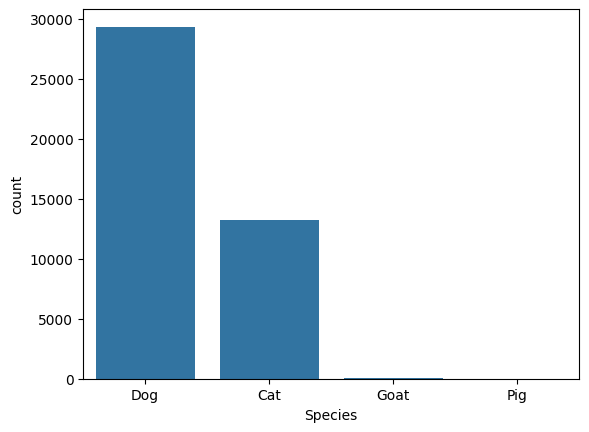

In [152]:
## Q1: Number of Licenses by Species
species_counts = dat_clean['Species'].value_counts() # There were 21 and 2 pet licenses submitted for Goats and Pigs respectively!
species_counts = pd.DataFrame(species_counts)

sns.barplot(data=species_counts, x='Species', y='count', ci=None)

### Q2: What Seattle Zipcode has the greatest number of pet licenses?

C:\Users\tbonn\AppData\Local\Temp\ipykernel_21512\771592904.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=zip_counts, x='Zip', y='count', ci=None)


<Axes: xlabel='Zip', ylabel='count'>

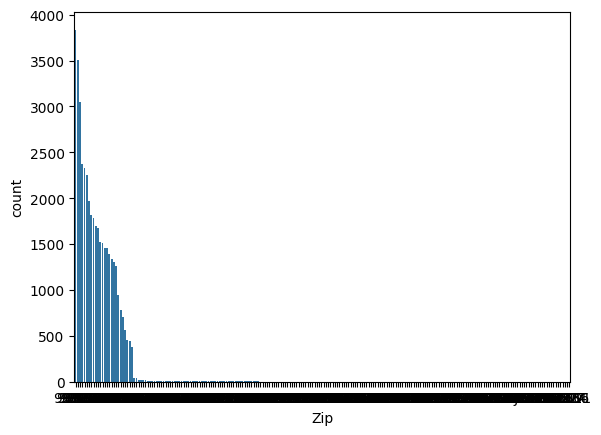

In [153]:
## Q2: Pet Licenses by Zip Code
zip_counts = dat_clean['Zip'].value_counts().reset_index()

sns.barplot(data=zip_counts, x='Zip', y='count', ci=None)

### Q3: How does the number of pet licenses change (year over year)?

C:\Users\tbonn\AppData\Local\Temp\ipykernel_21512\1475785609.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=yearly_counts, x='Year', y='count', ci=None)


<Axes: xlabel='Year', ylabel='count'>

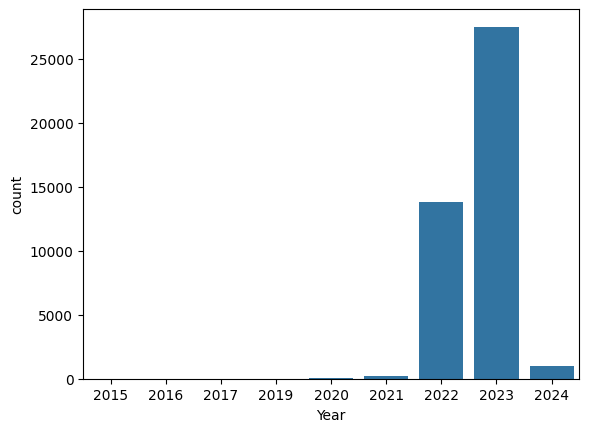

In [155]:
## Q3: Pet Licenses by Year
yearly_counts = dat_clean['Year'].value_counts().reset_index()

sns.barplot(data=yearly_counts, x='Year', y='count', ci=None)

### Q4: What are the most popular primary breeds for each species? 

In [145]:
## Q4: Most Popular Breeds by Species
top_breeds_cat = find_top_breed(df=dat_clean, species='Cat', breed_type='Primary_Breed')
top_breeds_dog = find_top_breed(df=dat_clean, species='Dog', breed_type='Primary_Breed')
top_breeds_goat = find_top_breed(df=dat_clean, species='Goat', breed_type='Primary_Breed')
top_breeds_pig = find_top_breed(df=dat_clean, species='Pig', breed_type='Primary_Breed')